<h1>Boys Planet Data Analysis and Visualization</h1>
In this project, I will be analyzing data from a survival show that I am currently watching called Boys Planet. After the cleaning and simple analysis, I will use the organized data to do visualization on Tableau. More information can be found in the README.md which I will write soon (hopefully).<br>
The data are obtained from spreadsheets that are circulating online and compiled by fans. Therefore, I will verify and clean the data first before analysing and preparing it for Tableau visualization.

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import re
from scipy import stats

In [2]:
#reading files
bp1 = pd.read_excel('Boys Planet (EP1-5).xlsx')
bp2 = pd.read_excel('Boys Planet (EP6-8).xlsx')

In [3]:
#Exploring the dataframes
print(bp1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              93 non-null     object 
 1   Points                            54 non-null     object 
 2   No Benefit                        54 non-null     object 
 3   Korean Votes                      54 non-null     object 
 4   Intl. Votes                       54 non-null     object 
 5   Total Votes                       54 non-null     object 
 6   Ep 1 Ranking                      93 non-null     int64  
 7   Ep 2 Ranking                      93 non-null     int64  
 8   Ep 5 Ranking (First Elimination)  93 non-null     int64  
 9   Performance in Ep 1               93 non-null     bool   
 10  Performance in Ep 2               93 non-null     bool   
 11  Performance Group Mission 1       93 non-null     object 
 12  Performanc

In [4]:
print(bp2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Name                             51 non-null     object
 1   Points                           30 non-null     object
 2   No Benefit                       30 non-null     object
 3   Korean Votes                     30 non-null     object
 4   Intl. Votes                      30 non-null     object
 5   Total Votes                      30 non-null     object
 6   Ep 6 Ranking                     51 non-null     int64 
 7   Ep 8 Ranking (Second Elimation)  51 non-null     int64 
 8   Performance Group Mission 2      51 non-null     object
dtypes: int64(2), object(7)
memory usage: 3.7+ KB
None


From bp1 dataframe, most columns have 93 non-null datapoints, which is correct since there are 93 contestants at the start. <br>
The company column have missing values, which is most likely left empty if the contestants do not have any company. <br>
I will fix that later.<br>
Some columns only have 54 datapoints as it is related to the elimination.<br>
The Country (Map) column have zero values because it is a geography data type in excel so I will drop that column. <br>
From bp2 dataframe, it looks accurate but I will check it just in case.<br>
First, I shall fix the column names to a snakecase format.



In [5]:
#changing the columns name to snakecase
colnamebp1 = bp1.columns
snakecasename = []
for name in colnamebp1:
    name = re.sub(r'\s+', '_', name)
    name = re.sub('[^A-Za-z\d[_]]', '', name)
    name = re.sub(r'[()-.]', '', name)
    name = name.lower()
    snakecasename.append(name)

bp1.columns = snakecasename

colnamebp2 = bp2.columns
snakecasename = []
for name in colnamebp2:
    name = re.sub(r'\s+', '_', name)
    name = re.sub('[^A-Za-z\d[_]]', '', name)
    name = re.sub(r'[()-.]', '', name)
    name = name.lower()
    snakecasename.append(name)

bp2.columns = snakecasename

In [6]:
print(bp1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            93 non-null     object 
 1   points                          54 non-null     object 
 2   no_benefit                      54 non-null     object 
 3   korean_votes                    54 non-null     object 
 4   intl_votes                      54 non-null     object 
 5   total_votes                     54 non-null     object 
 6   ep_1_ranking                    93 non-null     int64  
 7   ep_2_ranking                    93 non-null     int64  
 8   ep_5_ranking_first_elimination  93 non-null     int64  
 9   performance_in_ep_1             93 non-null     bool   
 10  performance_in_ep_2             93 non-null     bool   
 11  performance_group_mission_1     93 non-null     object 
 12  performance_in_ep_3             93 non

In [7]:
print(bp2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   name                           51 non-null     object
 1   points                         30 non-null     object
 2   no_benefit                     30 non-null     object
 3   korean_votes                   30 non-null     object
 4   intl_votes                     30 non-null     object
 5   total_votes                    30 non-null     object
 6   ep_6_ranking                   51 non-null     int64 
 7   ep_8_ranking_second_elimation  51 non-null     int64 
 8   performance_group_mission_2    51 non-null     object
dtypes: int64(2), object(7)
memory usage: 3.7+ KB
None


In [8]:
bp1 = bp1.drop('country_map', axis=1)

In [9]:
#Next I want to join the two dataframe into one
bp = pd.merge(bp1, bp2, on='name', how='outer', suffixes = ('_first_elim','_second_elim'))
print(bp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            93 non-null     object 
 1   points_first_elim               54 non-null     object 
 2   no_benefit_first_elim           54 non-null     object 
 3   korean_votes_first_elim         54 non-null     object 
 4   intl_votes_first_elim           54 non-null     object 
 5   total_votes_first_elim          54 non-null     object 
 6   ep_1_ranking                    93 non-null     int64  
 7   ep_2_ranking                    93 non-null     int64  
 8   ep_5_ranking_first_elimination  93 non-null     int64  
 9   performance_in_ep_1             93 non-null     bool   
 10  performance_in_ep_2             93 non-null     bool   
 11  performance_group_mission_1     93 non-null     object 
 12  performance_in_ep_3             93 non

In [10]:
#Some columns that should be an integer, like points, are saved as object. This will convert them to interger dtype.
print(bp['points_first_elim'])

0     1 604 766
1     1 137 561
2       634 033
3       374 970
4     1 130 151
        ...    
88      341 689
89          NaN
90          NaN
91    5 636 185
92      732 400
Name: points_first_elim, Length: 93, dtype: object


In [11]:
def col_to_num(col):
    col = col.str.replace(' ','')
    col = pd.to_numeric(col)
    return col

In [12]:
bp['points_first_elim'] = col_to_num(bp['points_first_elim'])
bp['no_benefit_first_elim'] = col_to_num(bp['no_benefit_first_elim'])
bp['korean_votes_first_elim'] = col_to_num(bp['korean_votes_first_elim'])
bp['intl_votes_first_elim'] = col_to_num(bp['intl_votes_first_elim'])
bp['total_votes_first_elim'] = col_to_num(bp['total_votes_first_elim'])
bp['points_second_elim'] = col_to_num(bp['points_second_elim'])
bp['no_benefit_second_elim'] = col_to_num(bp['no_benefit_second_elim'])
bp['korean_votes_second_elim'] = col_to_num(bp['korean_votes_second_elim'])
bp['intl_votes_second_elim'] = col_to_num(bp['intl_votes_second_elim'])
bp['total_votes_second_elim'] = col_to_num(bp['total_votes_second_elim'])

print(bp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            93 non-null     object 
 1   points_first_elim               54 non-null     float64
 2   no_benefit_first_elim           54 non-null     float64
 3   korean_votes_first_elim         54 non-null     float64
 4   intl_votes_first_elim           54 non-null     float64
 5   total_votes_first_elim          54 non-null     float64
 6   ep_1_ranking                    93 non-null     int64  
 7   ep_2_ranking                    93 non-null     int64  
 8   ep_5_ranking_first_elimination  93 non-null     int64  
 9   performance_in_ep_1             93 non-null     bool   
 10  performance_in_ep_2             93 non-null     bool   
 11  performance_group_mission_1     93 non-null     object 
 12  performance_in_ep_3             93 non

In [13]:
#checking if there are any wrong/repeated values in the ranking columns
print(bp['ep_1_ranking'].value_counts().sum())
print(bp['ep_2_ranking'].value_counts().sum())
print(bp['ep_5_ranking_first_elimination'].value_counts().sum())
print(bp['ep_6_ranking'].value_counts().sum())
print(bp['ep_8_ranking_second_elimation'].value_counts().sum())

93
93
93
51
51


<h2>Analysis</h2>

<h3>Whether being shown in first episode affects ranking and first elimination</h3>
First let's look at the biggest rank change between first and second episode and determine if being shown in the first episode helps in jumping in ranks

In [14]:
ep1_2_rank_change = bp['name']
ep1_2_rank_change = ep1_2_rank_change.to_frame()
ep1_2_rank_change['change_in_rank'] = bp['ep_1_ranking'] - bp['ep_2_ranking']
ep1_2_rank_change['performance_ep1'] = bp['performance_in_ep_1']


In [15]:
ep1_2_rank_change.sort_values(by='change_in_rank')

,name,change_in_rank,performance_ep1
66,Park Gwan Young,-31,False
24,Hyo,-28,False
34,Jung Ho Jin,-20,False
70,Park Min Seok,-20,False
90,Yuto,-17,False
...,...,...,...
6,Chen Kuan Jui,24,True
75,Seok Matthew,27,True
15,Dong Dong,32,True
33,Ji Yun Seo,33,True


In [16]:
ep1_2_rank_change[ep1_2_rank_change['performance_ep1'] == True].sort_values(by='change_in_rank', ascending=False)

,name,change_in_rank,performance_ep1
59,Na Kamden,45,True
33,Ji Yun Seo,33,True
15,Dong Dong,32,True
75,Seok Matthew,27,True
6,Chen Kuan Jui,24,True
7,Chen Liang,22,True
29,Jay,22,True
21,Haruto,19,True
86,Yoo Seung Eon,18,True
13,Cong,18,True


In [17]:
ep1_2_rank_change[ep1_2_rank_change['performance_ep1'] == False].sort_values(by='change_in_rank', ascending=False)


,name,change_in_rank,performance_ep1
41,Kim Min Hyuk,8,False
87,Yoon Jong Woo,6,False
73,Riku,5,False
17,Han Seo Bin,4,False
89,Yutaka,3,False
77,Takuto,1,False
30,Jeon Ho Young,1,False
49,Lee Hoe Taek,0,False
38,Keita,0,False
23,Hong Keon Hee,0,False


In [18]:
ep1_2_rank_change.pivot_table(index='performance_ep1', values='change_in_rank', aggfunc=(np.mean,len,np.max,np.min))

,amax,amin,len,mean
performance_ep1,,,,
False,8,-31,45,-5.311111
True,45,-17,48,4.979167


In [19]:
positive_change = ep1_2_rank_change[ep1_2_rank_change['performance_ep1'] == True]
positive_change = positive_change[positive_change['change_in_rank'] > 0]

In [20]:
ep1_2_first_elim = bp['name'].to_frame()
ep1_2_first_elim['first_elim_rank'] = bp['ep_5_ranking_first_elimination']
ep1_2_first_elim['performance_ep1'] = bp['performance_in_ep_1']
ep1_2_first_elim['eliminated'] = ep1_2_first_elim['first_elim_rank'].apply(lambda x: True if x > 52 else False)

In [21]:
ep1_2_first_elim['performance_ep1'].corr(ep1_2_first_elim['eliminated'])

0.12302218920543583

On average, those that are shown in episode 1 rose 5 ranks while those that did not fall 5 ranks. This showed how being shown in the first episode could have a significant impact on the contestant's early show popularity. 26/45 of those that had their performance shown in episode 1 had a positive change to their ranks. The biggest increase in rank among those that performed in episode 1 is <b>45</b> while the biggest drop in rank is <b>-17</b>. On the other hand, the biggest increase in rank among those that did not perform in episode 1 is <b>8</b> while the biggest drop in rank is <b>-31</b>.<br>
However, it seems that whether being shown in episode 1 or otherwise <b>does not affect</b> the contestant's chance of being eliminated, with a correlation value of 0.12 (weak positive correlation). 

<h3>Analysis of star ranking</h3>

In [22]:
star = bp['name'].to_frame()
star['initial_level'] = bp['star_ranking_performance']
star['final_level'] = bp['star_ranking_reevaluation']
star['level_change'] = star['final_level'] - star['initial_level']
star['group'] = bp['group']
star['country'] = bp['country']

In [23]:
star.pivot_table(index=('final_level','group'), values = ('level_change', 'initial_level'), aggfunc=(np.mean,len,max,min))

initial_level                   level_change                \
                            len max      mean min          len max      mean   
final_level group                                                              
0           G                 9   3  0.777778   0            9   0 -0.777778   
            K                 5   2  0.600000   0            5   0 -0.600000   
1           G                15   3  1.133333   0           15   1 -0.133333   
            K                 8   3  2.375000   1            8   0 -1.375000   
2           G                11   3  1.454545   0           11   2  0.545455   
            K                10   3  1.900000   0           10   2  0.100000   
3           G                 7   4  2.571429   1            7   2  0.428571   
            K                14   4  3.357143   2           14   1 -0.357143   
4           G                 6   4  3.666667   3            6   1  0.333333   
            K                 8   4  3.375000   3            8   1  0.625000   

                       
                  min  
final_level group      
0           G      -3  
            K      -2  
1           G      -2  
            K      -2  
2           G      -1  
            K      -1  
3           G      -1  
            K      -1  
4           G       0  
            K       0

From the above table, we can see that:
1. All the <b>final all stars</b> had an initial level of at least 3 stars.<br>
2. None of the <b>initial all stars</b> fell below 3 stars.<br>
3. The highest level a <b>no star</b> got re-evaluated into is 2 stars<br> 
4. The K/G ratio in <b>2 stars and all stars</b> are quite balanced. The K/G ratio in <b>3 stars</b> is skewed towards K group while the <b>1 star and no star</b> K/G ratio is skewed towards G group.<br>

In [24]:
star.pivot_table(index=('country'), values = ('final_level'), aggfunc=(np.mean,len,max,min,np.std))

,len,max,mean,min,std
country,,,,,
Canada,2,4,2.500000,1,2.121320
China,18,4,1.222222,0,1.352799
Japan,17,4,1.882353,0,1.053705
South Korea,45,4,2.266667,0,1.268499
Taiwan,4,3,1.500000,1,1.000000
Thailand,3,3,1.333333,0,1.527525
United States,2,4,3.500000,3,0.707107
Vietnam,2,3,3.000000,3,0.000000


In [25]:
star['first_elim_rank'] = bp['ep_5_ranking_first_elimination']
star['eliminated'] = star['first_elim_rank'].apply(lambda x: True if x > 52 else False)

In [26]:
star['final_level'].corr(star['eliminated'])

-0.4200832282181679

Based on correlation between final level and elimination, there is a negative correlation.

In [27]:
plt.style.use('seaborn-pastel')

C:\Users\Althea\AppData\Local\Temp\ipykernel_21252\2737420197.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [28]:
survivor_star = star[star['eliminated'] == False]
survivor_star = survivor_star['final_level'].value_counts().sort_index()
elim_star = star[star['eliminated'] == True]
elim_star = elim_star['final_level'].value_counts().sort_index()
elim_star.loc['4'] = 0 #because there is no all star being eliminated

In [29]:
print(elim_star)

0     8
1    14
2    15
3     4
4     0
Name: final_level, dtype: int64


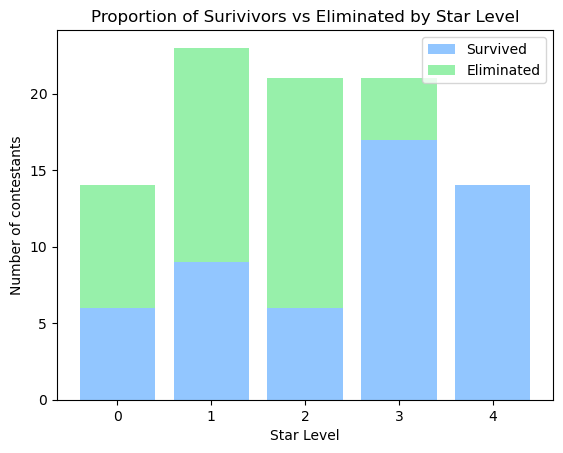

In [30]:
# Create a stacked bar chart
plt.bar(survivor_star.index, survivor_star, label='Survived')
plt.bar(survivor_star.index, elim_star, label='Eliminated', bottom=survivor_star)
#plt.bar(groups, false_responses, bottom=true_responses, label='False')

# Add axis labels and legend
plt.xlabel('Star Level')
plt.ylabel('Number of contestants')
plt.legend()
plt.title('Proportion of Surivivors vs Eliminated by Star Level')
plt.show()

The 3 and all stars have a high survival rate in the first elimination, with 81% of the 3 stars and all of the all stars surviving the first elimination. On the other hand, the no stars, 1 star and 2 stars saw more than half of the contestants getting eliminated. It is interesting to note that the proportion of contestants being eliminated in the 2 stars group was the highest at 71%, compared to 60% in the 1 star group and 57% in the no star group.

Text(0.5, 1.0, 'Composition of Survivors per Star Level')

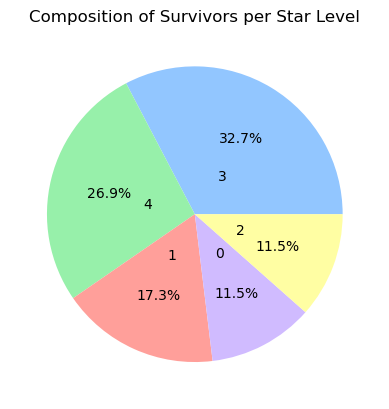

In [31]:
star_survive = star[star['eliminated'] == False]
star_survive['final_level'].value_counts().plot(kind='pie', label=(''), labeldistance = 0.3, autopct='%1.1f%%')
plt.title('Composition of Survivors per Star Level')

3 and all stars makes up more than half the surviving contestants after the first elimination. 

<h3>Analysing the First Mission</h3>

In [32]:
firstmission = bp['name'].to_frame()
firstmission['group']=bp['performance_group_mission_1']
firstmission['star_level'] = bp['star_ranking_reevaluation']
firstmission['ranking_first_elimination'] = bp['ep_5_ranking_first_elimination']
firstmission['ep3_performance'] = bp['performance_in_ep_3']
firstmission['performance_episode'] = firstmission['ep3_performance'].apply(lambda x: 'EP 3' if x == True else 'EP 4')

In [33]:
#First let's take a look at the groups 
first = firstmission.pivot_table(index=('group'), values=('star_level','ranking_first_elimination'))
print(first)

                                ranking_first_elimination  star_level
group                                                                
Aju Nice - Seventeen (G)                        49.142857    1.142857
Aju Nice - Seventeen (K)                        30.428571    2.285714
Back Door - Stray Kids (G)                      42.142857    1.714286
Back Door - Stray Kids (K)                      25.000000    3.000000
Burn It Up - Wanna One (G)                      76.000000    1.428571
Burn It Up - Wanna One (K)                      66.000000    0.833333
Danger - BTS (G)                                72.000000    0.857143
Danger - BTS (K)                                44.714286    1.857143
Hot Sauce - NCT DREAM (G)                       70.000000    0.571429
Hot Sauce - NCT DREAM (K)                       39.666667    2.166667
Kill This Love - Blackpink (G)                  21.500000    3.666667
Kill This Love - Blackpink (K)                  57.400000    2.200000
Love Me Right - EXO 

Text(0, 0.5, 'Average Group Ranking at First Elimination')

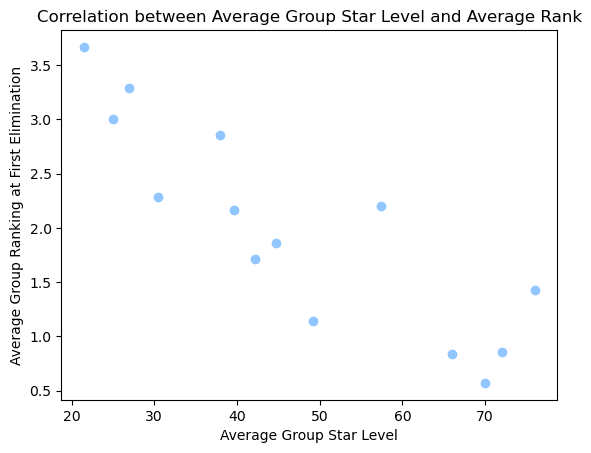

In [34]:
plt.scatter(first['ranking_first_elimination'], first['star_level'])
plt.title('Correlation between Average Group Star Level and Average Rank')
plt.xlabel('Average Group Star Level')
plt.ylabel('Average Group Ranking at First Elimination')

From the table above, there are 3 groups with average star level per member of > 3. Those 3 groups (Love Me Right - EXO (K), Kill This Love - Blackpink (G) and Back Door - Stray Kids (K)) are also the only groups with average ranking of <30. <br>
There are 3 groups with average star level per member of < 1. Those groups (Burn It Up - Wanna One (K), Danger - BTS (G), Hot Sauce - NCT DREAM (G)) have one of the highest average ranking.<br>
From the scatter plot, we can tell that the higher the average star level, the better the average ranking outcome for the group in the first elimination.

In [35]:
ep3 = firstmission[firstmission['performance_episode'] == 'EP 3']
ep3 = ep3['ranking_first_elimination']
ep4 = firstmission[firstmission['performance_episode'] == 'EP 4']
ep4 = ep4['ranking_first_elimination']

In [36]:
stats.ttest_ind(ep3,ep4)

Ttest_indResult(statistic=-2.1866508073249222, pvalue=0.03133281959245574)

In [37]:
firstmission.pivot_table(index='performance_episode', values='ranking_first_elimination', aggfunc=(max,min, np.mean))

,max,mean,min
performance_episode,,,
EP 3,85,38.718750,2
EP 4,93,51.344262,1


From the t-test, there is a significant difference in ranking differences between groups that had their first mission performance aired in episode 3 compared to those that are aired in episode 4. The average ranking at first elimination for those that are shown in episode 3 is 38.7 while the average for those shown in episode 4 is 51.3.<br>
This showed that there is a huge benefit to having their performance aired earlier in terms of chances of being eliminated.

<h2>I will continue the analysis for second mission someday...</h2>

<h3>Preparing data for Tableau Visualization</h3>